In [14]:
# import necessary packages
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating a Network Graph

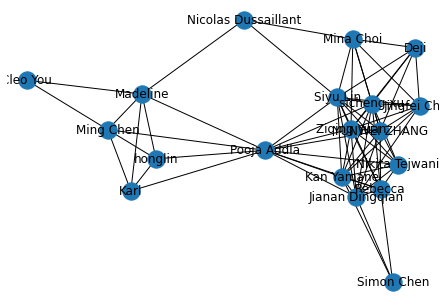

In [16]:
# import data
data = pd.read_csv("Downloads/ICE8_Data.csv", index_col = 0)

# Create a graph model
G = nx.Graph(data)
nx.draw(G, with_labels = True)

### Network Statistics

#### Density
Density represents the "completeness" of the graph; the number of edges present in the network compared to the total possible number of edges

In [21]:
density = nx.density(G)
print(f"The edge density is: {round(density, 3)}")

The edge density is: 0.415


#### Degree Centrality
Degree is defined as the number of edges each node has.  
The degree centrality tells us how "important" each node is in the network; i.e. which nodes are directly connected to lots of other nodes.

In [24]:
degree = nx.degree(G) # The return value is a dictionary
print(pd.DataFrame(degree))

                      0   1
0   Nicolas Dussaillant   3
1             Ming Chen   5
2               Rebecca   9
3        Nikita Tejwani   8
4            Simon Chen   3
5           Pooja Addla  12
6               honglin   4
7                  Karl   4
8            sicheng xu  11
9       Jianan Dingqian  10
10             Siyu Lin  12
11          Ziqing Yuan  11
12         Jingfei Chen   8
13            Mina Choi   7
14             Cleo You   2
15                 Deji   6
16           Kan Yamane  10
17         YUNWEI ZHANG  11
18             Madeline   6


#### Closeness Centrality
Closeness centrality measures "how quickly" a node can axess other nodes in the graph. Mathmatically, it is the reciprocal of th average shortest path from a given node to all other reachable nodes.

In [32]:
close = nx.closeness_centrality(G)
print(pd.DataFrame.from_dict(close, orient = 'index'))

                            0
Nicolas Dussaillant  0.529412
Ming Chen            0.514286
Rebecca              0.642857
Nikita Tejwani       0.620690
Simon Chen           0.428571
Pooja Addla          0.750000
honglin              0.500000
Karl                 0.500000
sicheng xu           0.692308
Jianan Dingqian      0.666667
Siyu Lin             0.720000
Ziqing Yuan          0.692308
Jingfei Chen         0.529412
Mina Choi            0.529412
Cleo You             0.367347
Deji                 0.486486
Kan Yamane           0.666667
YUNWEI ZHANG         0.692308
Madeline             0.545455


#### Betweenness Centrality
Betweenness centrality is the amount of "influence" a node has over the flow of information on a graph. It is used to find nodes that serve as a bridge from one part of the graph to another. The algorithm calculates the unweighted shortest paths between all pairs of nodes in a graph.

In [34]:
between = nx.betweenness_centrality(G)
print(pd.DataFrame.from_dict(between, orient = 'index'))

                            0
Nicolas Dussaillant  0.028494
Ming Chen            0.043542
Rebecca              0.029879
Nikita Tejwani       0.000000
Simon Chen           0.000000
Pooja Addla          0.363663
honglin              0.000000
Karl                 0.000000
sicheng xu           0.037340
Jianan Dingqian      0.042367
Siyu Lin             0.092655
Ziqing Yuan          0.037340
Jingfei Chen         0.007096
Mina Choi            0.019367
Cleo You             0.000000
Deji                 0.000000
Kan Yamane           0.042367
YUNWEI ZHANG         0.037340
Madeline             0.087831


#### Community Detection
Community detection is the "clustering" of a graph. There are many algorithms to calculate clusters. Here, we will be using a modularity optimization method.

In [37]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))
print(len(c))

2


In [38]:
# Observe the clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


#### Drawing more Elaborate Graphs
In order to draw prettier graphs (such as graphs that are colored by community), we need to use functions other than `nx.draw()`.  
Essentially, we will be adding layers of elements of the graph (much like ggplot in R).

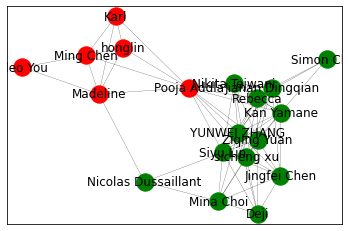

In [43]:
# Set seed (optional, but necessary to ensure that each trial produces the same output)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print all the communities with color
nx.draw_networkx_nodes(G,
                       pos = pos, 
                       nodelist = community_0, 
                       node_color = 'green')
nx.draw_networkx_nodes(G,
                       pos = pos, 
                       nodelist = community_1, 
                       node_color = 'red')

# Print out the edges
nx.draw_networkx_edges(G, 
                       pos = pos, 
                       width = 0.2)

# Print labels
nx.draw_networkx_labels(G, pos = pos)

plt.show()
